# Statistiques

On cherche à avoir un apperçu de nos données, et plus particulièrement celles des apports nutritifs quotidiens nécessaires pour être en bonne santé.

On cherche également à faire une régression polynomiale de nos données. On remarque directement qu'une régression linéaire simple s'éloigne fortement de l'allure générale de nos données. Arbitrairement, on choisit un degré de regression de 7, qui semble suivre fidèlement les données (plus on augmente le degré, plus la regression est précise (polynome de Lagrange pour passer exactement par tous les points)).

On séparera les femmes et les hommes pour plus de lisibilité et on tracera sur le mêmes graphiques les besoins en kcal journaliers en fonction de l'âge et de l'activité sportive.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline


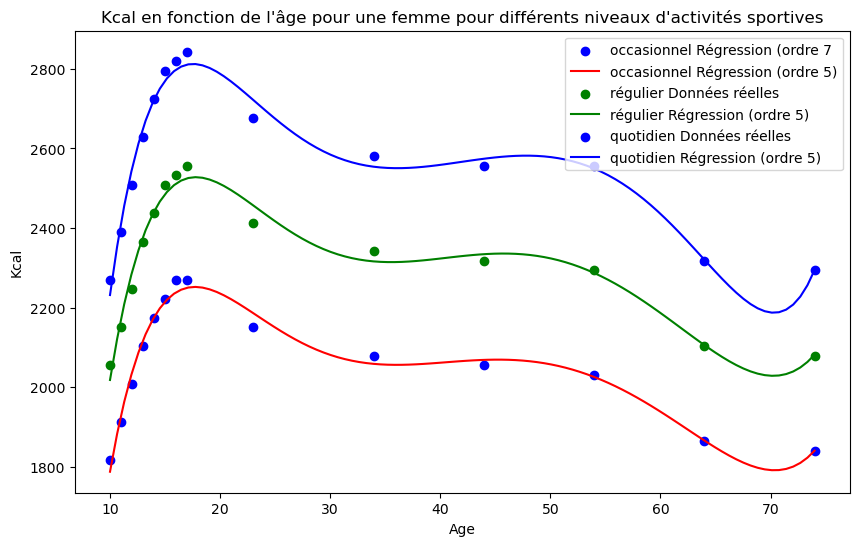

In [3]:

data_1_6 = {
    'Age': [10, 11, 12, 13, 14, 15, 16, 17, 23, 34, 44, 54, 64, 74],
    'Kcal': [1815.792, 1911.36, 2006.928, 2102.496, 2174.172, 2221.956, 2269.74, 2269.74,
             2150.28, 2078.604, 2054.712, 2030.82, 1863.576, 1839.684]
}

data_1_8 = {
    'Age': [10, 11, 12, 13, 14, 15, 16, 17, 23, 34, 44, 54, 64, 74],
    'Kcal': [2054.712, 2150.28, 2245.848, 2365.308, 2436.984, 2508.66, 2532.552, 2556.444,
             2413.092, 2341.416, 2317.524, 2293.632, 2102.496, 2078.604]
}

data_2_0 = {
    'Age': [10, 11, 12, 13, 14, 15, 16, 17, 23, 34, 44, 54, 64, 74],
    'Kcal': [2269.74, 2389.2, 2508.66, 2628.12, 2723.688, 2795.364, 2819.256, 2843.148,
             2675.904, 2580.336, 2556.444, 2556.444, 2317.524, 2293.632]
}

df_1_6 = pd.DataFrame(data_1_6)
df_1_8 = pd.DataFrame(data_1_8)
df_2_0 = pd.DataFrame(data_2_0)

# Conversion en matrices 2D pour sklearn
X_1_6 = df_1_6[['Age']].values
y_1_6 = df_1_6['Kcal'].values

X_1_8 = df_1_8[['Age']].values
y_1_8 = df_1_8['Kcal'].values

X_2_0 = df_2_0[['Age']].values
y_2_0 = df_2_0['Kcal'].values

# Détermination de la meilleure régression polynomiale pour chaque degré d'activité
best_degree = 7  # On teste jusqu'à l'ordre 5
best_model_1_6 = make_pipeline(PolynomialFeatures(best_degree), LinearRegression())
best_model_1_8 = make_pipeline(PolynomialFeatures(best_degree), LinearRegression())
best_model_2_0 = make_pipeline(PolynomialFeatures(best_degree), LinearRegression())

best_model_1_6.fit(X_1_6, y_1_6)
best_model_1_8.fit(X_1_8, y_1_8)
best_model_2_0.fit(X_2_0, y_2_0)

# Préparation des données pour les courbes de régression
X_fit = np.linspace(min(X_1_6.min(), X_1_8.min(), X_2_0.min()), 
                    max(X_1_6.max(), X_1_8.max(), X_2_0.max()), 
                    100)[:, np.newaxis]

# Prédiction des valeurs pour les courbes
y_fit_1_6 = best_model_1_6.predict(X_fit)
y_fit_1_8 = best_model_1_8.predict(X_fit)
y_fit_2_0 = best_model_2_0.predict(X_fit)

# Tracé des données et des courbes de régression
plt.figure(figsize=(10, 6))
plt.scatter(X_1_6, y_1_6, color='blue', label=f'occasionnel Régression (ordre {best_degree}')
plt.plot(X_fit, y_fit_1_6, color='red', label='occasionnel Régression (ordre 5)')
plt.scatter(X_1_8, y_1_8, color='green', label='régulier Données réelles')
plt.plot(X_fit, y_fit_1_8, color='green', label='régulier Régression (ordre 5)')
plt.scatter(X_2_0, y_2_0, color='blue', label='quotidien Données réelles')
plt.plot(X_fit, y_fit_2_0, color='blue', label='quotidien Régression (ordre 5)')

plt.title("Kcal en fonction de l\'âge pour une femme pour différents niveaux d'activités sportives")
plt.xlabel('Age')
plt.ylabel('Kcal')
plt.legend()
plt.show()


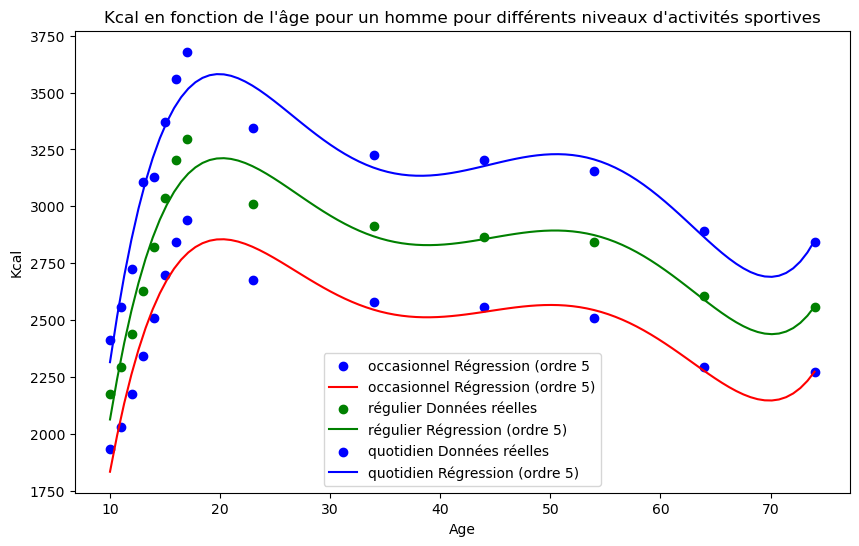

In [20]:
data_1_6 = {
    'Age': [10, 11, 12, 13, 14, 15, 16, 17, 23, 34, 44, 54, 64, 74],
    'Kcal': [1935.252, 2030.82, 2174.172, 2341.416, 2508.66, 2699.796, 2843.148, 2938.716,
             2675.904, 2580.336, 2556.444, 2508.66, 2293.632, 2269.74]
}

data_1_8 = {
    'Age': [10, 11, 12, 13, 14, 15, 16, 17, 23, 34, 44, 54, 64, 74],
    'Kcal': [
        2174.172, 2293.632, 2436.984, 2628.12, 2819.256, 3034.284,
        3201.528, 3297.096, 3010.392, 2914.824, 2867.04, 2843.148,
        2604.228, 2556.444
    ]
}


data_2_0 = {
    'Age': [10, 11, 12, 13, 14, 15, 16, 17, 23, 34, 44, 54, 64, 74],
    'Kcal': [
        2413.092, 2556.444, 2723.688, 3105.96, 3129.852, 3368.772,
        3559.908, 3679.368, 3344.88, 3225.42, 3201.528, 3153.744,
        2890.932, 2843.148
    ]}
    
df_1_6 = pd.DataFrame(data_1_6)
df_1_8 = pd.DataFrame(data_1_8)
df_2_0 = pd.DataFrame(data_2_0)

# Conversion en matrices 2D pour sklearn
X_1_6 = df_1_6[['Age']].values
y_1_6 = df_1_6['Kcal'].values

X_1_8 = df_1_8[['Age']].values
y_1_8 = df_1_8['Kcal'].values

X_2_0 = df_2_0[['Age']].values
y_2_0 = df_2_0['Kcal'].values

# Détermination de la meilleure régression polynomiale pour chaque PAL
best_degree = 7  # On teste jusqu'à l'ordre 5
best_model_1_6 = make_pipeline(PolynomialFeatures(best_degree), LinearRegression())
best_model_1_8 = make_pipeline(PolynomialFeatures(best_degree), LinearRegression())
best_model_2_0 = make_pipeline(PolynomialFeatures(best_degree), LinearRegression())

best_model_1_6.fit(X_1_6, y_1_6)
best_model_1_8.fit(X_1_8, y_1_8)
best_model_2_0.fit(X_2_0, y_2_0)

# Préparation des données pour les courbes de régression
X_fit = np.linspace(min(X_1_6.min(), X_1_8.min(), X_2_0.min()), 
                    max(X_1_6.max(), X_1_8.max(), X_2_0.max()), 
                    100)[:, np.newaxis]

# Prédiction des valeurs pour les courbes
y_fit_1_6 = best_model_1_6.predict(X_fit)
y_fit_1_8 = best_model_1_8.predict(X_fit)
y_fit_2_0 = best_model_2_0.predict(X_fit)

# Tracé des données et des courbes de régression
plt.figure(figsize=(10, 6))
plt.scatter(X_1_6, y_1_6, color='blue', label=f'occasionnel Régression (ordre {best_degree}')
plt.plot(X_fit, y_fit_1_6, color='red', label='occasionnel Régression (ordre 5)')
plt.scatter(X_1_8, y_1_8, color='green', label='régulier Données réelles')
plt.plot(X_fit, y_fit_1_8, color='green', label='régulier Régression (ordre 5)')
plt.scatter(X_2_0, y_2_0, color='blue', label='quotidien Données réelles')
plt.plot(X_fit, y_fit_2_0, color='blue', label='quotidien Régression (ordre 5)')

plt.title("Kcal en fonction de l\'âge pour un homme pour différents niveaux d'activités sportives")
plt.xlabel('Age')
plt.ylabel('Kcal')
plt.legend()
plt.show()
